# Exercise 5 - Analysis and Visualisation of Complex Agro-Environmental Data

**In this exercise we will use again the dataset in EFIplus_medit.zip to perform some hypothesis testing.**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels.stats as stm
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

1. Test if the frequency of sites with presence and absence of Salmo trutta fario (Brown Trout) are 
independent from the country. Please state which is/are the null hypothesis of your test(s).

**We will be using the Chi-Square Test of Independence to determine whether or not there is a significant association between two categorical variables.**

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [6]:
# Create a contingency table -> counts the number of sites with presence and absence of Brown Trout for each country
contingency_table = pd.crosstab(df["Country"], df["Salmo trutta fario"])
contingency_table

Salmo trutta fario,0,1
Country,,
France,13,59
Italy,109,76
Portugal,615,252
Spain,1239,2648


**Null hypothesis**

H0: The *Salmo trutta fario* (Brown Trout) and the country are independent.

**Alpha = 0.05**

In [26]:
stat, p, dof, expected = sts.chi2_contingency(contingency_table)
print("The chi-squared statistic is " + str(stat))
print("The p-value is " + str(p))
print("The degrees of freedom are " + str(dof))
print("The expected cell counts are shown in the following array " + str(expected))


The chi-squared statistic is 496.3723854072799
The p-value is 2.9162328651936495e-107
The degrees of freedom are 3
The expected cell counts are shown in the following array [[  28.39193774   43.60806226]
 [  72.95150669  112.04849331]
 [ 341.88625025  525.11374975]
 [1532.77030533 2354.22969467]]


**Conclusion: The *Salmo trutta fario* (Brown Trout) and the country are NOT independent, because p < 0.05 which means the null hypothesis is rejected.**

2. Test whether the means (or medians) of “Actual_river_slope” between presence and absence sites of
Salmo trutta fario (Brown Trout) are equal using an appropriate test. Please state which is/are the null 
hypothesis of your test(s).

In [30]:
df2 = df.dropna()
df3 = df2[['Salmo trutta fario','Actual_river_slope']]
sample0 = df2[df2['Salmo trutta fario'] == 0]['Actual_river_slope']
sample1 = df2[df2['Salmo trutta fario'] == 1]['Actual_river_slope']

**Calculate the means and medians**

In [31]:
print('sample means: %.3f, %.3f' % (sample0.mean(), sample1.mean()))
print('sample medians: %.3f, %.3f' % (sample0.median(), sample1.median()))

sample means: 8.187, 18.100
sample medians: 4.050, 10.700


<AxesSubplot: xlabel='Salmo trutta fario', ylabel='Actual_river_slope'>

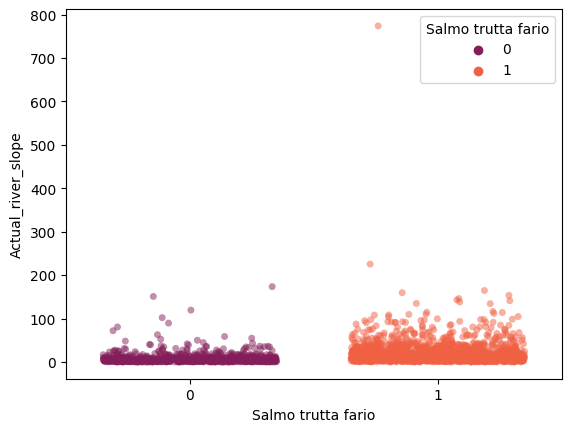

In [43]:
sns.stripplot(df3, x='Salmo trutta fario', y='Actual_river_slope', hue='Salmo trutta fario', jitter=.35, alpha=.5, palette="rocket")

**We will be using the Mann-Whitney U Test**

**Null hypothesis**

H0: The populations have equal medians.

**Alpha = 0.05**

In [44]:
stat, p = sts.mannwhitneyu(sample0, sample1, alternative='two-sided')
print('t-stat=%.3f, p-value=%.3f' % (stat, p))

t-stat=439968.000, p-value=0.000


**Conclusion: The populations don't have equal medians, because p < 0.05 which means the null hypothesis is rejected.**